In [2]:
import datetime
import re

import numpy
import pandas
import matplotlib.pyplot
import matplotlib.dates

dfany = pandas.read_csv("pip-counts-any.csv", parse_dates=[0], infer_datetime_format=True)
dfsci = pandas.read_csv("pip-counts-scientific-linux.csv", parse_dates=[0], infer_datetime_format=True)
dfos = pandas.read_csv("pip-counts-by-os.csv", parse_dates=[0], infer_datetime_format=True)

In [9]:
dfos.groupby("project").count().sort_values("count", ascending=False)

,date,os,version,count
project,,,,
numpy,65507,65507,65507,65507
scipy,53751,53751,53751,53751
pandas,52245,52245,52245,52245
tensorflow,45917,45917,45917,45917
matplotlib,41499,41499,41499,41499
scikit-learn,34454,34452,34454,34454
torch,10193,10193,10193,10193
iminuit,2967,2967,2967,2967
uproot,2365,2365,2365,2365


In [12]:
# FIXME: change the order of the columns so that iminuit is last (so that the colors are stable.)

def plotit(df, vertical, title, selection, islog=True, dropminuit=False):
    if dropminuit:
        df = df[df["project"] != "iminuit"]
    if selection is not None:
        df = df[df["os"] == selection]
    ax = df.groupby(["date", "project"])["count"].sum().unstack().fillna(0).rolling(30).mean().plot(figsize=(10, 4))
    matplotlib.pyplot.title(title)
    if islog:
        matplotlib.pyplot.yscale("log")
    matplotlib.pyplot.xlabel("")
    matplotlib.pyplot.ylabel("pip-installs/day, 30-day moving average")
    handles, labels = ax.get_legend_handles_labels()
    order = ["numpy", "scipy", "pandas", "tensorflow", "matplotlib", "scikit-learn", "torch", "uproot", "awkward", "iminuit"]
    if dropminuit:
        order = order[:-1]
    ax.legend([handles[labels.index(x)] for x in order], order, loc="upper left", frameon=False)
    ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 10, 22)))
    ax.set_ylim((0.01, vertical))
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

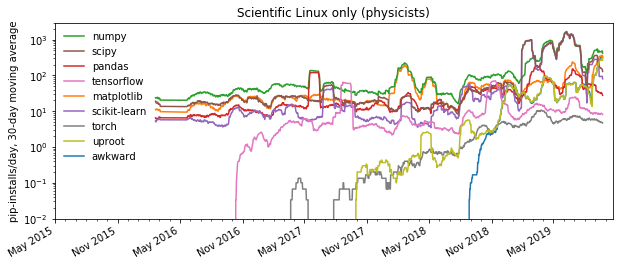

In [14]:
plotit(dfsci, 3000, "Scientific Linux only (physicists)", None, dropminuit=True)

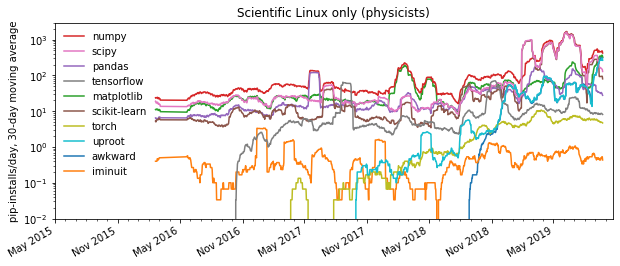

In [15]:
plotit(dfsci, 3000, "Scientific Linux only (physicists)", None)

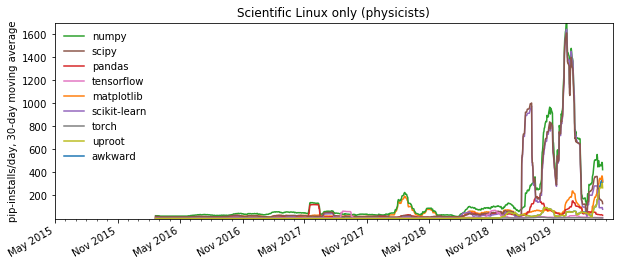

In [16]:
plotit(dfsci, 1700, "Scientific Linux only (physicists)", None, dropminuit=True, islog=False)

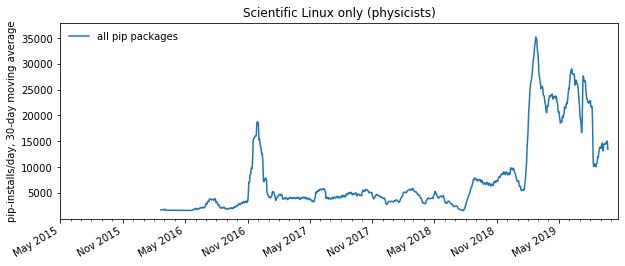

In [17]:
ax = dfany.groupby(["date"])["count"].sum().rolling(30).mean().plot(figsize=(10, 4))
matplotlib.pyplot.title("Scientific Linux only (physicists)")
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("pip-installs/day, 30-day moving average")
handles, labels = ax.get_legend_handles_labels()
ax.legend(["all pip packages"], loc="upper left", frameon=False)
ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 10, 22)))
ax.set_ylim((0.01, 38000))
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

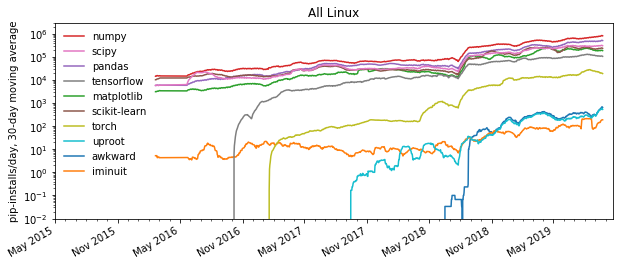

In [18]:
plotit(dfos, 3000000, "All Linux", "Linux")

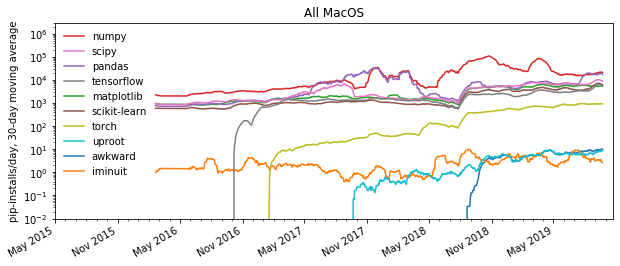

In [19]:
plotit(dfos, 3000000, "All MacOS", "Darwin")

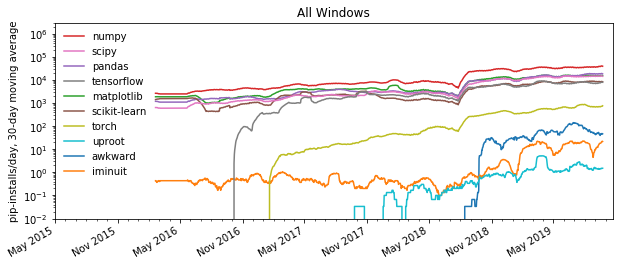

In [20]:
plotit(dfos, 3000000, "All Windows", "Windows")

In [42]:
dfuproot = pandas.read_csv("github-issues-uproot.csv", parse_dates=[4, 5], infer_datetime_format=True)
dfmethods = pandas.read_csv("github-issues-uproot-methods.csv", parse_dates=[4, 5], infer_datetime_format=True)
dfawkward = pandas.read_csv("github-issues-awkward.csv", parse_dates=[4, 5], infer_datetime_format=True)

dfuproot["package"] = "uproot"
dfmethods["package"] = "uproot-methods"
dfawkward["package"] = "awkward-array"
dfissues = pandas.concat([dfuproot, dfmethods, dfawkward])

dfissues["opened"] = 1
dfissues["closed"] = dfissues["state"].apply(lambda x: 1 if x == "closed" else 0)

dfissues.columns

Index(['number', 'title', 'user', 'state', 'date_created', 'date_closed',
       'numcomments', 'ispull', 'package', 'opened', 'closed'],
      dtype='object')

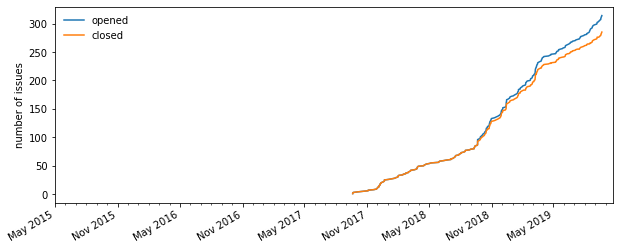

In [45]:
ax = dfissues[["date_created", "opened", "closed"]][~dfissues["ispull"]].set_index("date_created", inplace=False).sort_index().cumsum().plot(figsize=(10, 4))
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("number of issues")
handles, labels = ax.get_legend_handles_labels()
ax.legend(loc="upper left", frameon=False)
ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 10, 22)))
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

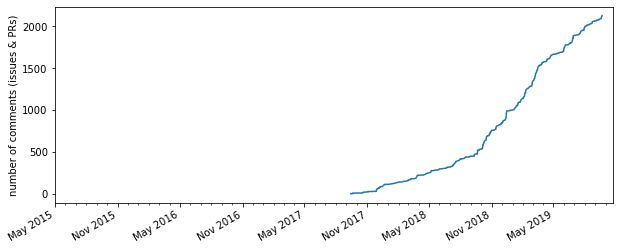

In [49]:
ax = dfissues[["date_created", "numcomments"]].set_index("date_created", inplace=False).sort_index().cumsum().plot(figsize=(10, 4))
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("number of comments (issues & PRs)")
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 10, 22)))
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

In [136]:
dfos.groupby(["os"]).count().sort_values("count", ascending=False);

In [11]:
dfgit = pandas.read_csv("github-cmssw.csv", parse_dates=[3], infer_datetime_format=True)
dfgit.columns

Index(['repo', 'owner', 'isfork', 'created', 'language'], dtype='object')

In [27]:
dfgit["lang"] = dfgit["language"].apply(lambda x: {
    "'C++'": "C/C++", "'C'": "C/C++", "'C#'": "C/C++", "'Objective-C'": "C/C++",
    "'Python'": "Python",
    "'Jupyter Notebook'": "Jupyter",
    "'TeX'": "TeX/LaTeX",
    "'Java'": "Java",
    "'R'": "R",
    "'VHDL'": "VHDL/Verilog", "'Verilog'": "VHDL/Verilog",
    "'Fortran'": "Fortran", "'FORTRAN'": "Fortran",
    "'Julia'": "Julia",
    "'Go'": "Go",
    "None": "(unknown)",
    }.get(x, "(other)"))

In [28]:
dfgit.groupby("lang").count().sort_values("repo", ascending=False)

,repo,owner,isfork,created,language
lang,,,,,
C/C++,13832,13832,13832,13832,13832
Python,8870,8870,8870,8870,8870
(other),4674,4674,4674,4674,4674
(unknown),4523,4523,4523,4523,4523
Jupyter,1578,1578,1578,1578,1578
Java,722,722,722,722,722
TeX/LaTeX,634,634,634,634,634
Go,231,231,231,231,231
VHDL/Verilog,155,155,155,155,155
